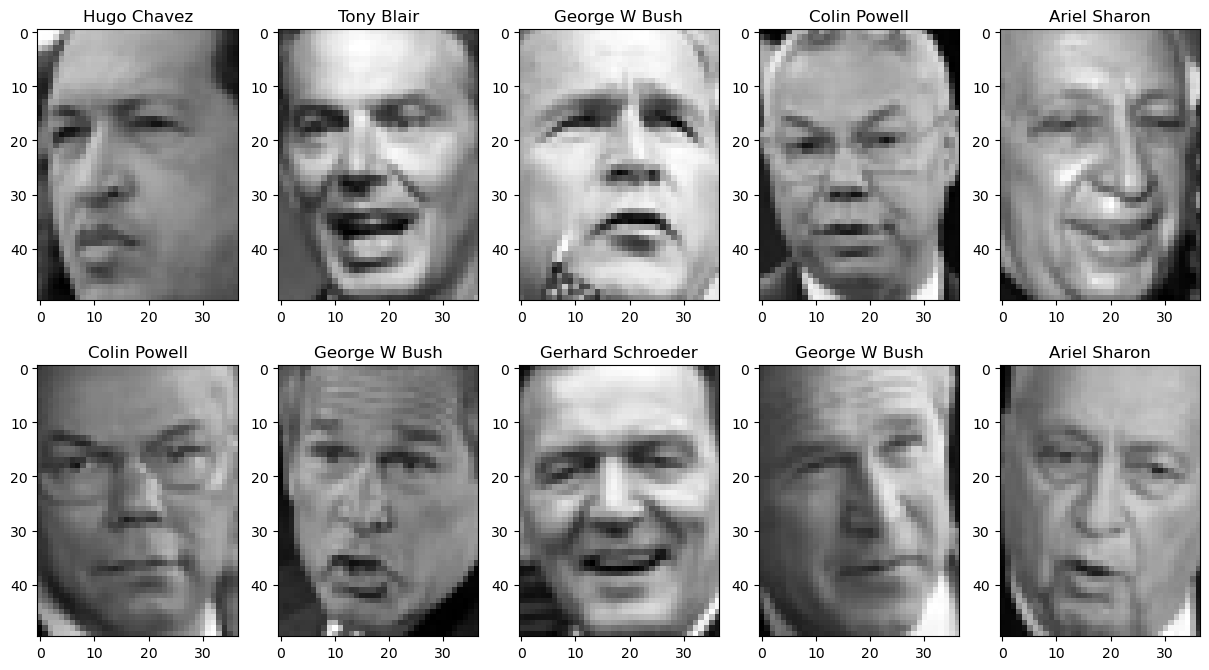

In [10]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# Fetch the dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Visualize some faces
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(lfw_people.images[i], cmap='gray')
    ax.set_title(target_names[y[i]])
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

def l2distance(xTr, xTe):
    """
    Compute the Euclidean distance between each pair of points in xTr and xTe.
    """
    squared_xTr = np.sum(np.square(xTr), axis=1).reshape(-1, 1)
    squared_xTe = np.sum(np.square(xTe), axis=1)
    D = np.sqrt(squared_xTr + squared_xTe - 2 * np.dot(xTr, xTe.T))
    return D

def findknn(xTr, xTe, k):
    """
    Finds the k nearest neighbors of xTe in xTr.
    """
    D = l2distance(xTr, xTe)
    indices = np.argsort(D, axis=0)[:k, :]
    dists = np.sort(D, axis=0)[:k, :]
    return indices, dists

def accuracy(truth, preds):
    """
    Analyzes the accuracy of a prediction against the ground truth.
    """
    assert len(truth) == len(preds)
    return np.mean(np.equal(truth, preds))

def custom_mode(a):
    """
    Finds the mode (most common element) in array 'a'.
    """
    unique_values, counts = np.unique(a, return_counts=True)
    max_count_index = np.argmax(counts)
    mode_item = unique_values[max_count_index]
    return mode_item

def weighted_voting(neighbor_labels, distances):
    """
    Perform weighted voting based on distances.
    """
    from collections import defaultdict

    weights = 1 / (distances + 1e-5)  # Add a small value to avoid division by zero
    vote_counts = defaultdict(float)

    for label, weight in zip(neighbor_labels, weights):
        vote_counts[label] += weight

    return max(vote_counts, key=vote_counts.get)

def knnclassifier(xTr, yTr, xTe, k, use_weights=False):
    """
    k-nn classifier.
    """
    yTr = yTr.flatten()
    indices, dists = findknn(xTr, xTe, k)
    neighbor_labels = yTr[indices]

    if use_weights:
        preds = np.array([weighted_voting(neighbor_labels[:, i], dists[:, i]) for i in range(neighbor_labels.shape[1])])
    else:
        preds = np.array([custom_mode(neighbor_labels[:, i]) for i in range(neighbor_labels.shape[1])])

    return preds

def preprocess_data(xTr, xTe):
    """
    Normalize and reduce dimensionality of the data.
    """
    scaler = StandardScaler()
    xTr = scaler.fit_transform(xTr)
    xTe = scaler.transform(xTe)

    pca = PCA(n_components=min(xTr.shape[1], 50))  # Adjust number of components as needed
    xTr = pca.fit_transform(xTr)
    xTe = pca.transform(xTe)

    return xTr, xTe

def main():
    X = lfw_people.data
    y = lfw_people.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Preprocess data
    X_train, X_test = preprocess_data(X_train, X_test)

    # Define the number of neighbors
    k = 7

    # Find k-nearest neighbors and classify
    y_pred = knnclassifier(X_train, y_train, X_test, k)

    # Compute accuracy
    result = accuracy(y_test, y_pred)
    print(f"Classification accuracy: {result * 100:.2f}%")

if __name__ == "__main__":
    main()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets



In [ ]:


import numpy as np

def l2distance(xTr, xTe):
    """
    Compute the Euclidean distance between each pair of points in xTr and xTe.

    Parameters:
    xTr -- (N, D) numpy array of training data
    xTe -- (M, D) numpy array of test data

    Returns:
    D -- (N, M) numpy array of Euclidean distances
    """
    # Compute the squared Euclidean distances
    squared_xTr = np.sum(np.square(xTr), axis=1).reshape(-1, 1)
    squared_xTe = np.sum(np.square(xTe), axis=1)
    D = np.sqrt(squared_xTr + squared_xTe - 2 * np.dot(xTr, xTe.T))
    return D


def findknn(xTr, xTe, k):
    """
    function [indices, dists] = findknn(xTr, xTe, k)
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """
    # Compute distances between xTr and xTe
    D = l2distance(xTr, xTe)
    # Get the indices of the k smallest distances
    indices = np.argsort(D, axis=0)[:k, :]
    # Get the corresponding distances
    dists = np.sort(D, axis=0)[:k, :]
    return indices, dists


def accuracy(truth, preds):
    """
    function output=accuracy(truth, preds)
    
    Analyzes the accuracy of a prediction against the ground truth
    
    Input:
    truth = n-dimensional vector of true class labels
    preds = n-dimensional vector of predictions
    
    Output:
    accuracy = scalar (percent of predictions that are correct)
    """
    assert len(truth) == len(preds)
    result = np.equal(truth, preds)
    accuracy = np.mean(result)
    return accuracy


def custom_mode(a):
    """
    Finds the mode (most common element) in array 'a'.
    
    Input:
    a: numpy array
    
    Output:
    mode_item: mode of the input array 'a'
    """
    unique_values, counts = np.unique(a, return_counts=True)
    max_count_index = np.argmax(counts)
    mode_item = unique_values[max_count_index]
    return mode_item

def knnclassifier(xTr, yTr, xTe, k):
    """
    k-nn classifier.
    
    Input:
    xTr: nxd input matrix with n row-vectors of dimensionality d
    yTr: n-dimensional vector of labels
    xTe: mxd input matrix with m row-vectors of dimensionality d
    k: number of nearest neighbors to be found
    
    Output:
    preds: predicted labels, i.e., preds[i] is the predicted label of xTe[i,:]
    """
    
    yTr = yTr.flatten()
    indices, _ = findknn(xTr, xTe, k)
    neighbor_labels = yTr[indices]
    preds = np.array([custom_mode(neighbor_labels[:, i]) for i in range(neighbor_labels.shape[1])])
    return preds


import numpy as np

def custom_mode(a):
    """
    Finds the mode (most common element) in array 'a'.
    
    Input:
    a: numpy array
    
    Output:
    mode_item: mode of the input array 'a'
    """
    unique_values, counts = np.unique(a, return_counts=True)
    max_count_index = np.argmax(counts)
    mode_item = unique_values[max_count_index]
    return mode_item

def knnclassifier(xTr, yTr, xTe, k):
    """
    k-nn classifier.
    
    Input:
    xTr: nxd input matrix with n row-vectors of dimensionality d
    yTr: n-dimensional vector of labels
    xTe: mxd input matrix with m row-vectors of dimensionality d
    k: number of nearest neighbors to be found
    
    Output:
    preds: predicted labels, i.e., preds[i] is the predicted label of xTe[i,:]
    """
    
    yTr = yTr.flatten()
    indices, _ = findknn(xTr, xTe, k)
    neighbor_labels = yTr[indices]
    preds = np.array([custom_mode(neighbor_labels[:, i]) for i in range(neighbor_labels.shape[1])])
    return preds


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


# Define the number of neighbors
k = 7

# Find k-nearest neighbors and classify
y_pred = knnclassifier(X_train, y_train, X_test, k)

# Compute accuracy
result = accuracy(y_test, y_pred)
print(f"Classification accuracy: {result * 100:.2f}%")


In [8]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


# Define the number of neighbors
k = 7

# Find k-nearest neighbors and classify
y_pred = knnclassifier(X_train, y_train, X_test, k)

# Compute accuracy
result = accuracy(y_test, y_pred)
print(f"Classification accuracy: {result * 100:.2f}%")


Classification accuracy: 61.18%
